**Equivalence between maximizing log-likelihood of label and minimizing criterion function with negative log likelihood**


Aiming to minimize the log likelihood function given by:

$J(w)= - \log(\prod_n \prod_{m=0}^9 p(t_n=m|x_n;w))$

for m ranging from digit 0 to 9

Let $p(t_m|x;w)$ be a categorical probability distribution :

$p(t_m|x;w) = y_m(x;w)^{t_m}$

$t_m \in \{0,1\} and \sum_m t_m=1$

Let $y_m(x;w)$ be softmax probabilities from the output nodes i.e.

$y_i(x;w)=\frac{\exp^{y_i(x;w)}}{\sum_{j=0}^m \exp^{y_j(x;w)}}$

The curve for negative log-likelihood looks as follows:

<img src="curve.PNG" width="300" height="300">

which means for it to be minimum the value of the likelihood must be close to 1.

The negative log likelihood can be reduced to :


$J(w)= - \sum_n \sum_{m=0}^9 t_m^{(n)} \log (y_m^{(n)}(x^{(n)};w))$

$t_m$ is one-hot encoded vector thus for all wrong class labels the terms reduces to 0. If we denote the correct label to be 'c' for every feature sample we get:

$J(w)= - \sum_n 1 * \log (y_c^{(n)}(x^{(n)};w)) = - \log (\prod_n (y_c^{(n)}(x^{(n)};w)))$

To minimize the negative log-likelihood function, we need to maximize $(\prod_n  (y_c^{(n)}(x^{(n)};w)))$ to make it as close to 1 as possible.

Thus we can prove that a neural network to maximize the log likelihood of the correct label is one that has softmax output nodes and minimizes the criterion function of the negative log probability of training data set.

**Equivalence between maximizing posterior likelihood of training data and minimizing cost function with L2 regularization**

Let's say that the output $y$ is dependent on input feature $x$ using the following equation:

$y_i=wx_i+\epsilon$

where w is the set of weights and $\epsilon$ is Gaussian noise $\mathcal{N}(0,\sigma^{2})$

$w$ also has the Gaussian prior $\mathcal{N}(0,\alpha^{-1})$

Using Bayes Rule:

$P(w|D)=\frac{P(D|w)P(w)}{P(D)}$

Ignoring P(D) we can write:

$P(w|D)\approx {P(D|w)P(w)}$

The posterior probability we aim to maximize over w is :

$P(w|D) = \prod_{i=1}^{N} \mathcal{N}(y_i;x_i,w,\sigma^2) \mathcal{N}(0,\alpha^{-1})$

Taking logarithm of the posterior and ignoring any constants:

$\log P(w|D) = \sum_{i=1}^{N} \log \mathcal{N}(y_i;x_i,w,\sigma^2) + \log \mathcal{N}(0,\alpha^{-1})$

$\log P(w|D) = -\frac{1}{\sigma^2} \sum_{i=1}^{N} (y_i - wx_i)^2 -\alpha w^2$

This proves that maximizing the posterior likelihood of observing the training data is the same as minimizing the cost function with L2 regularization with $\alpha$ being the regularization constant.

The more we maximize the log of posterior likelihood of training data $\log P(w|D)$, the more cost function with L2 regularization $\sum_{i=1}^{N} (y_i - wx_i)^2 + \alpha w^2$ is minimized.

**Importing the Library functions**

In [91]:
import numpy as np
import tensorflow as tf
from keras.datasets import mnist
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [92]:
import matplotlib.pyplot as plt

In [93]:
X_train.shape

(60000, 28, 28)

**Reshaping the data**

In [94]:
X_train=X_train.reshape(60000,784)
X_test=X_test.reshape(10000,784)
y_train.shape

(60000,)

**Function to extraxt 1000 training and testing data with each of the 10 classes having 100 samples of data**

In [95]:
def get_data(x_data,y_data):
    data_list=[]
    label_list=[]
    count=[0,0,0,0,0,0,0,0,0,0]
    flag=[0,0,0,0,0,0,0,0,0,0]
    for i in range(len(x_data)):
        c=0
        if(count[y_data[i]]<100):
            count[y_data[i]]+=1
            data_list.append(x_data[i])
            label_list.append(y_data[i])
        else:
            continue
        for j in range(len(flag)):
            if(flag[j]==1):
                c+=1
        if(c==10):
            break
    return np.array(data_list),np.array(label_list)


In [96]:
X_train,y_train=get_data(X_train,y_train)
X_test, y_test=get_data(X_test, y_test)

In [97]:
X_train.shape

(1000, 784)

In [98]:
y_train.shape

(1000,)

**Performing One Hot encoding on the training and testing label data**

In [99]:
y_z=np.zeros((1000,10))
for i in range(len(y_z)):
    y_z[i][y_train[i]]=1
y_train=y_z

y_z=np.zeros((1000,10))
for i in range(len(y_z)):
    y_z[i][y_test[i]]=1
y_test=y_z


In [100]:
y_train.shape

(1000, 10)

**Normalising the data**

In [101]:
#Normalizing the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

**Defining the Models with the given parameters in the question**

**Model with One Layer**


In [102]:
def model_nn(X,Y,L2):
    model = Sequential()
    if(L2==True):
        model.add(Dense(X, input_dim=784, activation='sigmoid',kernel_regularizer=tf.keras.regularizers.l2(5)))
    else:
        model.add(Dense(X, input_dim=784, activation='sigmoid'))
    model.add(Dense(Y, activation='softmax'))
    model.summary()
    adam=tf.keras.optimizers.Adam(learning_rate=0.1)
    model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
    
    return model

**Model with Two Layers**

In [14]:
def model_nn_2(X,Y,L2):
    model = Sequential()
    if(L2==True):
        model.add(Dense(X, input_dim=784, activation='sigmoid',kernel_regularizer=tf.keras.regularizers.l2(5)))
        model.add(Dense(X, input_dim=30, activation='sigmoid',kernel_regularizer=tf.keras.regularizers.l2(5)))
    else:
        model.add(Dense(X, input_dim=784, activation='sigmoid'))
        model.add(Dense(X, input_dim=30, activation='sigmoid'))
        
    model.add(Dense(Y, activation='softmax'))
    model.summary()
    adam=tf.keras.optimizers.Adam(learning_rate=0.1)
    model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
    
    return model

**Model with Three Layers**

In [15]:
def model_nn_3(X,Y,L2):
    model = Sequential()
    if(L2==True):
        model.add(Dense(X, input_dim=784, activation='sigmoid',kernel_regularizer=tf.keras.regularizers.l2(5)))
        model.add(Dense(X, input_dim=30, activation='sigmoid',kernel_regularizer=tf.keras.regularizers.l2(5)))
        model.add(Dense(X, input_dim=30, activation='sigmoid',kernel_regularizer=tf.keras.regularizers.l2(5)))
    else:
        model.add(Dense(X, input_dim=784, activation='sigmoid'))
        model.add(Dense(X, input_dim=30, activation='sigmoid'))
        model.add(Dense(X, input_dim=30, activation='sigmoid'))
        
    model.add(Dense(Y, activation='softmax'))
    model.summary()
    adam=tf.keras.optimizers.Adam(learning_rate=0.1)
    model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
    
    return model

**Function for Model Accuracy**

In [16]:
def model_accuracy():
    
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

**Function for Model Loss**

In [17]:
def model_loss():
    import matplotlib.pyplot as plt
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

**Function for Zero-one error**

In [18]:
def error_model(model):
    
    X_train_err=[]
    X_train_acc=[]
    X_test_err=[]
    X_test_acc=[]
    
    for i in range(30):
        model.fit(X_train,y_train,epochs=1,batch_size=10)
        pred_train=model.predict_classes(X_train)
        pred_test=model.predict_classes(X_test)
        
        hits_train=0
        for i in range(1000):
            if(y_train[i][pred_train[i]]==1):
                hits_train+=1
        
        X_train_acc.append(hits_train/1000)
        X_train_err.append(1-(hits_train/1000))
        
        hits_test=0
        for i in range(1000):
            if(y_test[i][pred_test[i]]==1):
                hits_test+=1
                
        X_test_acc.append(hits_test/1000)
        X_test_err.append(1-(hits_test/1000))
        
    plt.plot(X_train_err)
    plt.plot(X_test_err)
    plt.title('Model Error')
    plt.ylabel('Error')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()
    
    plt.plot(X_train_acc)
    plt.plot(X_test_acc)
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()
        

**Function for Learning Speed**

In [19]:
def LearningRate(model,parameters):
    i=0
    W_diff_list=[]
    #model=model_nn(30,10)
    while(i<30):
        W_old=[]
        W_new=[]
        W_diff=[]
        
        old=model.get_weights()
        for j in range(len(old)):
            W_old.append(old[j])
        
        model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=1,batch_size=10)
        
        new=model.get_weights()
        for j in range(len(new)):
            W_new.append(new[j])
            
        for j in range(len(W_new)):
            W_diff.append(np.absolute((W_old[j]- W_new[j])/W_new[j]))
        
        W_diff_avg=0
        for j in range(len(W_diff)):
            W_diff_avg+=(np.sum(W_diff[j]))
        W_diff_avg/=(parameters)
        W_diff_list.append(W_diff_avg)
        i+=1
    return W_diff_list
        

**Learning Speed Plot function**

In [20]:
def LearningRate_plot(W_diff_list):
    plt.plot(W_diff_list)
    plt.title('Learning Rate of Hidden Layers')
    plt.ylabel('Learning rate')
    plt.xlabel('Epoch')
    plt.show()
        

**One Layer Model without regularization**

In [112]:
model=model_nn(30,10,False)
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=30, batch_size=10)

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_75 (Dense)             (None, 30)                23550     
_________________________________________________________________
dense_76 (Dense)             (None, 10)                310       
Total params: 23,860
Trainable params: 23,860
Non-trainable params: 0
_________________________________________________________________
Train on 1000 samples, validate on 1000 samples
Epoch 1/30
1000/1000 [==============================] - 0s 315us/step - loss: 1.3813 - accuracy: 0.5820 - val_loss: 1.1861 - val_accuracy: 0.6080
Epoch 2/30
1000/1000 [==============================] - 0s 242us/step - loss: 0.8243 - accuracy: 0.7420 - val_loss: 1.0511 - val_accuracy: 0.7020
Epoch 3/30
1000/1000 [==============================] - 0s 244us/step - loss: 0.7777 - accuracy: 0.7810 - val_loss: 1.0581 - val_accuracy: 0.6830
Epoch 4/30
1000/1000 [===

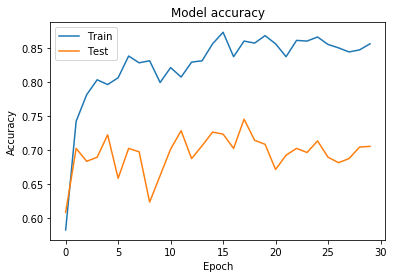

In [113]:
model_accuracy()

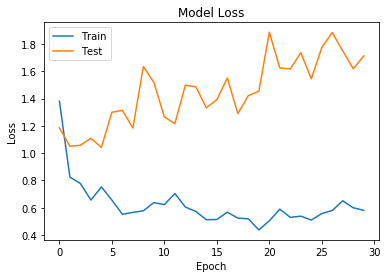

In [114]:
model_loss()

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_77 (Dense)             (None, 30)                23550     
_________________________________________________________________
dense_78 (Dense)             (None, 10)                310       
Total params: 23,860
Trainable params: 23,860
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1
1000/1000 [==============================] - 0s 277us/step - loss: 1.2557 - accuracy: 0.5900
Epoch 1/1
1000/1000 [==============================] - 0s 228us/step - loss: 0.8311 - accuracy: 0.7400
Epoch 1/1
1000/1000 [==============================] - 0s 232us/step - loss: 0.8485 - accuracy: 0.7470
Epoch 1/1
1000/1000 [==============================] - 0s 184us/step - loss: 0.8604 - accuracy: 0.7410
Epoch 1/1
1000/1000 [==============================] - 0s 152us/step - loss: 0.8221 - accuracy: 0.7

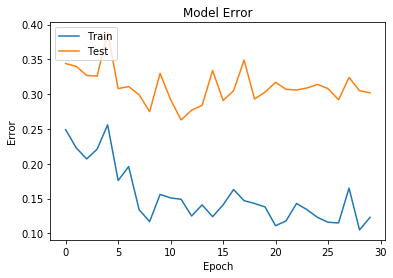

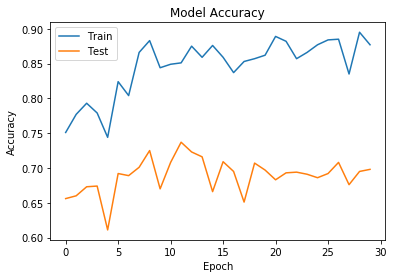

In [115]:
model=model_nn(30,10,False)
error_model(model)

In [116]:
model=model_nn(30,10,False)
W=LearningRate(model,(23550+310))

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_79 (Dense)             (None, 30)                23550     
_________________________________________________________________
dense_80 (Dense)             (None, 10)                310       
Total params: 23,860
Trainable params: 23,860
Non-trainable params: 0
_________________________________________________________________
Train on 1000 samples, validate on 1000 samples
Epoch 1/1
1000/1000 [==============================] - 0s 391us/step - loss: 1.3404 - accuracy: 0.5840 - val_loss: 1.1035 - val_accuracy: 0.6510
Train on 1000 samples, validate on 1000 samples
Epoch 1/1
1000/1000 [==============================] - 0s 366us/step - loss: 0.8214 - accuracy: 0.7520 - val_loss: 1.0649 - val_accuracy: 0.6710
Train on 1000 samples, validate on 1000 samples
Epoch 1/1
1000/1000 [==============================] - 0s 340us/step - loss: 

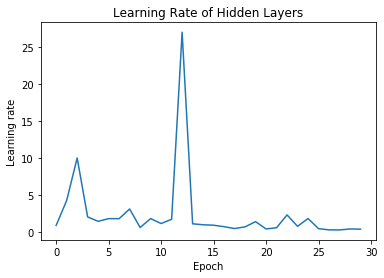

In [117]:
LearningRate_plot(W)

**One Layer Model with regularization**

In [118]:
model=model_nn(30,10,True)
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=30, batch_size=10)

Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_81 (Dense)             (None, 30)                23550     
_________________________________________________________________
dense_82 (Dense)             (None, 10)                310       
Total params: 23,860
Trainable params: 23,860
Non-trainable params: 0
_________________________________________________________________
Train on 1000 samples, validate on 1000 samples
Epoch 1/30
1000/1000 [==============================] - 0s 332us/step - loss: 30.7283 - accuracy: 0.1450 - val_loss: 3.5953 - val_accuracy: 0.2070
Epoch 2/30
1000/1000 [==============================] - 0s 255us/step - loss: 3.9097 - accuracy: 0.1840 - val_loss: 4.3267 - val_accuracy: 0.1950
Epoch 3/30
1000/1000 [==============================] - 0s 254us/step - loss: 5.0275 - accuracy: 0.2040 - val_loss: 5.0154 - val_accuracy: 0.2320
Epoch 4/30
1000/1000 [==

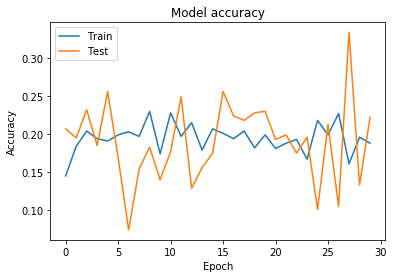

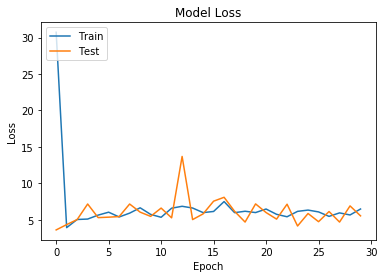

In [119]:
model_accuracy()
model_loss()

Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_83 (Dense)             (None, 30)                23550     
_________________________________________________________________
dense_84 (Dense)             (None, 10)                310       
Total params: 23,860
Trainable params: 23,860
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1
1000/1000 [==============================] - 0s 228us/step - loss: 30.6951 - accuracy: 0.1230
Epoch 1/1
1000/1000 [==============================] - 0s 254us/step - loss: 3.7179 - accuracy: 0.1740
Epoch 1/1
1000/1000 [==============================] - 0s 237us/step - loss: 4.6770 - accuracy: 0.1780
Epoch 1/1
1000/1000 [==============================] - 0s 204us/step - loss: 4.8421 - accuracy: 0.2070
Epoch 1/1
1000/1000 [==============================] - 0s 191us/step - loss: 5.0461 - accuracy: 0.

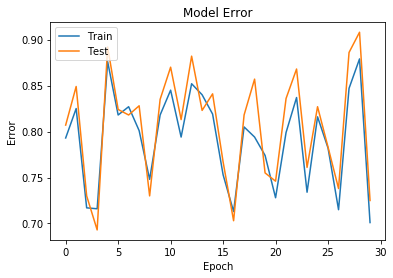

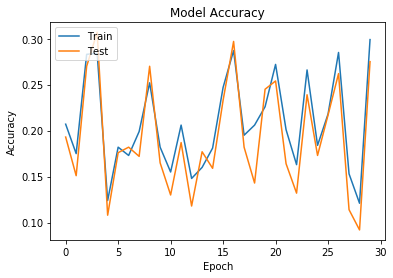

In [120]:
model=model_nn(30,10,True)
error_model(model)

In [121]:
model=model_nn(30,10,True)
W=LearningRate(model,(23550+310))

Model: "sequential_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_85 (Dense)             (None, 30)                23550     
_________________________________________________________________
dense_86 (Dense)             (None, 10)                310       
Total params: 23,860
Trainable params: 23,860
Non-trainable params: 0
_________________________________________________________________
Train on 1000 samples, validate on 1000 samples
Epoch 1/1
1000/1000 [==============================] - 0s 373us/step - loss: 30.8374 - accuracy: 0.1340 - val_loss: 3.0594 - val_accuracy: 0.1250
Train on 1000 samples, validate on 1000 samples
Epoch 1/1
1000/1000 [==============================] - 0s 268us/step - loss: 3.9004 - accuracy: 0.1730 - val_loss: 4.5355 - val_accuracy: 0.1750
Train on 1000 samples, validate on 1000 samples
Epoch 1/1
1000/1000 [==============================] - 0s 365us/step - loss:

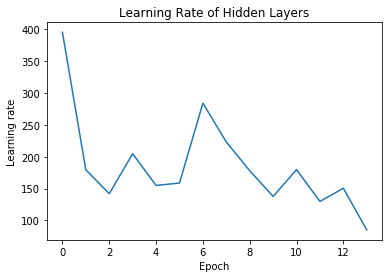

In [122]:
LearningRate_plot(W)

**Two Layer Model without regularization**

In [27]:
model=model_nn_2(30,10,False)
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=30, batch_size=10)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 30)                23550     
_________________________________________________________________
dense_8 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_9 (Dense)              (None, 10)                310       
Total params: 24,790
Trainable params: 24,790
Non-trainable params: 0
_________________________________________________________________
Train on 1000 samples, validate on 1000 samples
Epoch 1/30
1000/1000 [==============================] - 0s 388us/step - loss: 1.5217 - accuracy: 0.4720 - val_loss: 1.3268 - val_accuracy: 0.5520
Epoch 2/30
1000/1000 [==============================] - 0s 243us/step - loss: 1.0205 - accuracy: 0.6630 - val_loss: 1.2290 - val_accuracy: 0.5690
Epoch 3/30
1000/1000 [==================

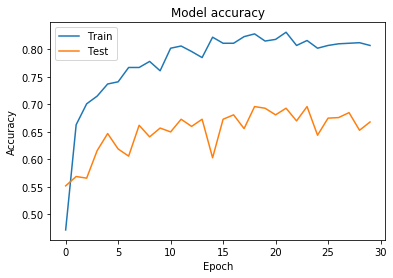

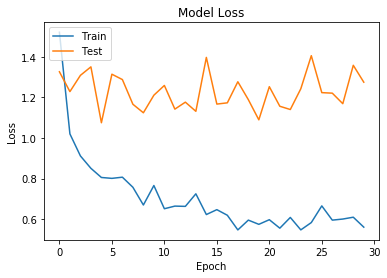

In [28]:
model_accuracy()
model_loss()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 30)                23550     
_________________________________________________________________
dense_11 (Dense)             (None, 30)                930       
_________________________________________________________________
dense_12 (Dense)             (None, 10)                310       
Total params: 24,790
Trainable params: 24,790
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1
1000/1000 [==============================] - 0s 243us/step - loss: 1.5514 - accuracy: 0.4320
Epoch 1/1
1000/1000 [==============================] - 0s 184us/step - loss: 1.0612 - accuracy: 0.6320
Epoch 1/1
1000/1000 [==============================] - 0s 150us/step - loss: 1.0390 - accuracy: 0.6740
Epoch 1/1
1000/1000 [==============================] - 0s 165us/step - 

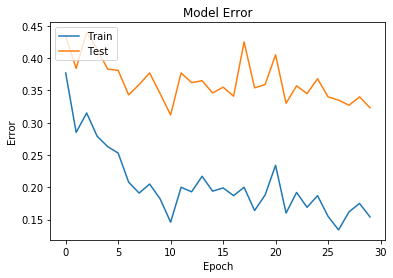

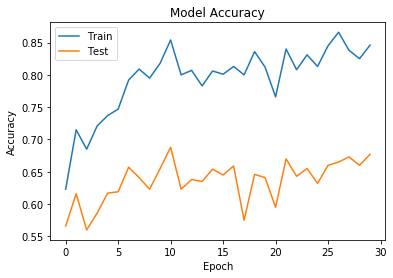

In [29]:
model=model_nn_2(30,10,False)
error_model(model)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 30)                23550     
_________________________________________________________________
dense_14 (Dense)             (None, 30)                930       
_________________________________________________________________
dense_15 (Dense)             (None, 10)                310       
Total params: 24,790
Trainable params: 24,790
Non-trainable params: 0
_________________________________________________________________
Train on 1000 samples, validate on 1000 samples
Epoch 1/1
1000/1000 [==============================] - 0s 381us/step - loss: 1.6348 - accuracy: 0.4370 - val_loss: 1.1676 - val_accuracy: 0.6250
Train on 1000 samples, validate on 1000 samples
Epoch 1/1
1000/1000 [==============================] - 0s 327us/step - loss: 0.9744 - accuracy: 0.6670 - val_loss: 1.2375 - val_accuracy: 0

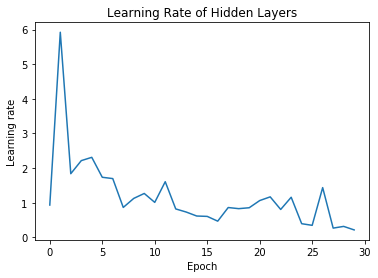

In [30]:
model=model_nn_2(30,10,False)
W=LearningRate(model,(24790))
LearningRate_plot(W)

**Two Layer Model with regularization**

In [31]:
model=model_nn_2(30,10,True)
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=30, batch_size=10)

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 30)                23550     
_________________________________________________________________
dense_17 (Dense)             (None, 30)                930       
_________________________________________________________________
dense_18 (Dense)             (None, 10)                310       
Total params: 24,790
Trainable params: 24,790
Non-trainable params: 0
_________________________________________________________________
Train on 1000 samples, validate on 1000 samples
Epoch 1/30
1000/1000 [==============================] - 0s 411us/step - loss: 35.3744 - accuracy: 0.0950 - val_loss: 2.3468 - val_accuracy: 0.1000
Epoch 2/30
1000/1000 [==============================] - 0s 299us/step - loss: 2.3355 - accuracy: 0.0860 - val_loss: 2.3122 - val_accuracy: 0.1000
Epoch 3/30
1000/1000 [=================

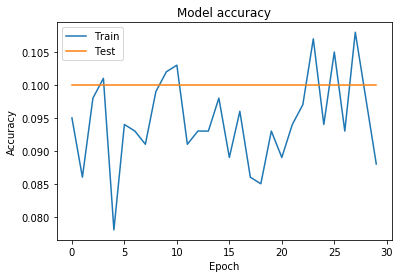

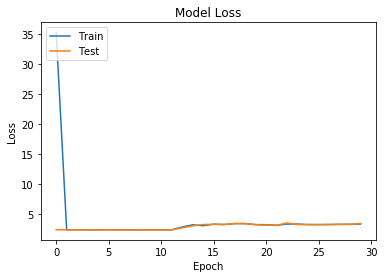

In [32]:
model_accuracy()
model_loss()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 30)                23550     
_________________________________________________________________
dense_20 (Dense)             (None, 30)                930       
_________________________________________________________________
dense_21 (Dense)             (None, 10)                310       
Total params: 24,790
Trainable params: 24,790
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1
1000/1000 [==============================] - 0s 248us/step - loss: 35.3365 - accuracy: 0.0980
Epoch 1/1
1000/1000 [==============================] - 0s 186us/step - loss: 2.3469 - accuracy: 0.1020
Epoch 1/1
1000/1000 [==============================] - 0s 232us/step - loss: 2.3366 - accuracy: 0.1010
Epoch 1/1
1000/1000 [==============================] - 0s 172us/step -

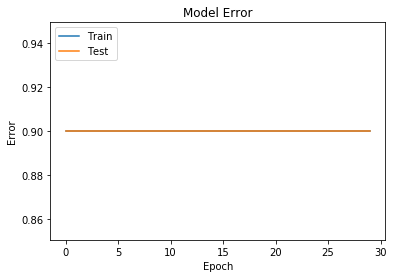

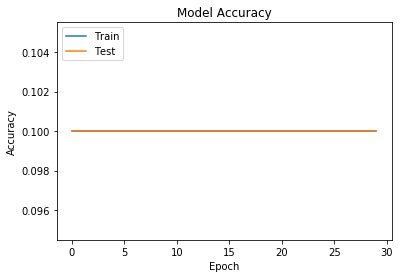

In [33]:
model=model_nn_2(30,10,True)
error_model(model)

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 30)                23550     
_________________________________________________________________
dense_23 (Dense)             (None, 30)                930       
_________________________________________________________________
dense_24 (Dense)             (None, 10)                310       
Total params: 24,790
Trainable params: 24,790
Non-trainable params: 0
_________________________________________________________________
Train on 1000 samples, validate on 1000 samples
Epoch 1/1
1000/1000 [==============================] - 0s 393us/step - loss: 35.5635 - accuracy: 0.0870 - val_loss: 2.3364 - val_accuracy: 0.1000
Train on 1000 samples, validate on 1000 samples
Epoch 1/1
1000/1000 [==============================] - 0s 277us/step - loss: 2.3427 - accuracy: 0.0890 - val_loss: 2.3202 - val_accuracy: 

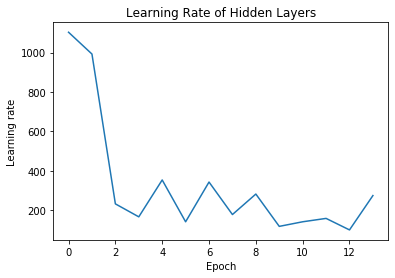

In [34]:
model=model_nn_2(30,10,True)
W=LearningRate(model,(24790))
LearningRate_plot(W)

**Three Layer Model without regularization**

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 30)                23550     
_________________________________________________________________
dense_26 (Dense)             (None, 30)                930       
_________________________________________________________________
dense_27 (Dense)             (None, 30)                930       
_________________________________________________________________
dense_28 (Dense)             (None, 10)                310       
Total params: 25,720
Trainable params: 25,720
Non-trainable params: 0
_________________________________________________________________
Train on 1000 samples, validate on 1000 samples
Epoch 1/30
1000/1000 [==============================] - 0s 377us/step - loss: 2.3781 - accuracy: 0.0850 - val_loss: 2.3173 - val_accuracy: 0.1000
Epoch 2/30
1000/1000 [==============================]

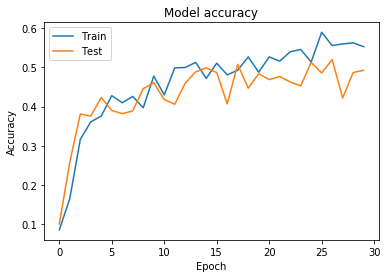

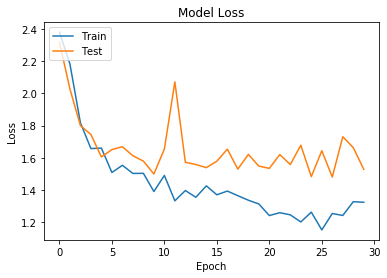

In [35]:
model=model_nn_3(30,10,False)
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=30, batch_size=10)
model_accuracy()
model_loss()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_37 (Dense)             (None, 30)                23550     
_________________________________________________________________
dense_38 (Dense)             (None, 30)                930       
_________________________________________________________________
dense_39 (Dense)             (None, 30)                930       
_________________________________________________________________
dense_40 (Dense)             (None, 10)                310       
Total params: 25,720
Trainable params: 25,720
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1
1000/1000 [==============================] - 0s 260us/step - loss: 2.3267 - accuracy: 0.1190
Epoch 1/1
1000/1000 [==============================] - 0s 178us/step - loss: 2.0401 - accuracy: 0.2010
Epoch 1/1
1000/1000 [====================

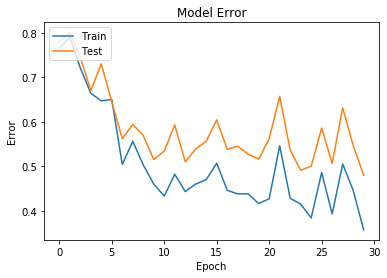

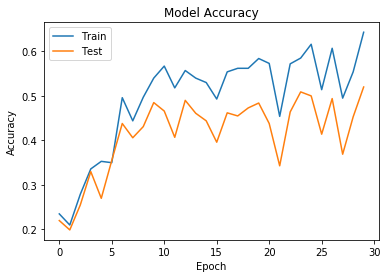

In [38]:
model=model_nn_3(30,10,False)
error_model(model)

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 30)                23550     
_________________________________________________________________
dense_34 (Dense)             (None, 30)                930       
_________________________________________________________________
dense_35 (Dense)             (None, 30)                930       
_________________________________________________________________
dense_36 (Dense)             (None, 10)                310       
Total params: 25,720
Trainable params: 25,720
Non-trainable params: 0
_________________________________________________________________
Train on 1000 samples, validate on 1000 samples
Epoch 1/1
1000/1000 [==============================] - 0s 396us/step - loss: 2.2507 - accuracy: 0.1540 - val_loss: 2.1032 - val_accuracy: 0.1770
Train on 1000 samples, validate on 1000 samples
Epoch 

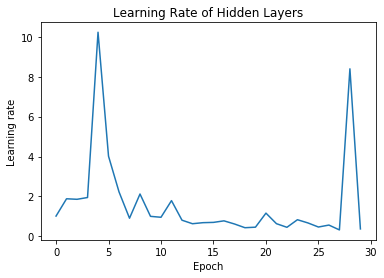

In [37]:
model=model_nn_3(30,10,False)
W=LearningRate(model,(24790))
LearningRate_plot(W)

**Three Layer Model with regularization**

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_41 (Dense)             (None, 30)                23550     
_________________________________________________________________
dense_42 (Dense)             (None, 30)                930       
_________________________________________________________________
dense_43 (Dense)             (None, 30)                930       
_________________________________________________________________
dense_44 (Dense)             (None, 10)                310       
Total params: 25,720
Trainable params: 25,720
Non-trainable params: 0
_________________________________________________________________
Train on 1000 samples, validate on 1000 samples
Epoch 1/30
1000/1000 [==============================] - 1s 518us/step - loss: 40.9483 - accuracy: 0.0810 - val_loss: 2.3330 - val_accuracy: 0.1000
Epoch 2/30
1000/1000 [==============================

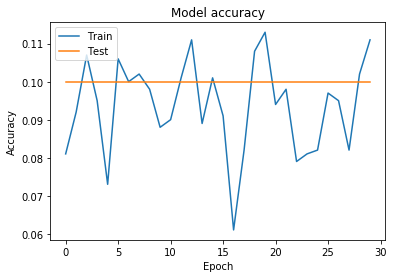

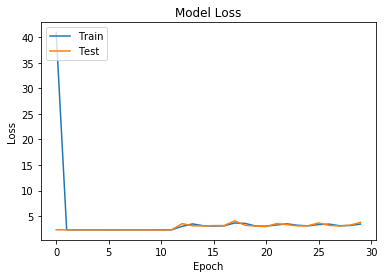

In [39]:
model=model_nn_3(30,10,True)
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=30, batch_size=10)
model_accuracy()
model_loss()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_45 (Dense)             (None, 30)                23550     
_________________________________________________________________
dense_46 (Dense)             (None, 30)                930       
_________________________________________________________________
dense_47 (Dense)             (None, 30)                930       
_________________________________________________________________
dense_48 (Dense)             (None, 10)                310       
Total params: 25,720
Trainable params: 25,720
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1
1000/1000 [==============================] - 0s 269us/step - loss: 40.8970 - accuracy: 0.1110
Epoch 1/1
1000/1000 [==============================] - 0s 188us/step - loss: 2.3433 - accuracy: 0.0940
Epoch 1/1
1000/1000 [===================

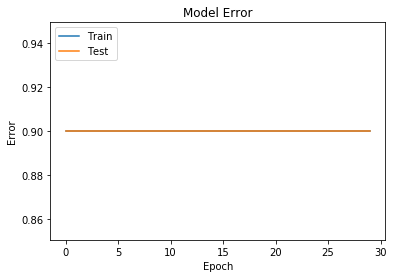

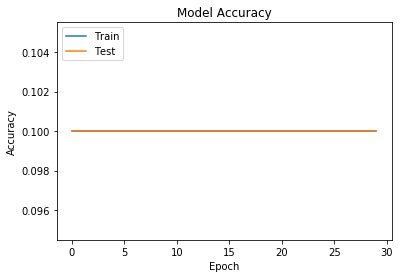

In [40]:
model=model_nn_3(30,10,True)
error_model(model)

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_49 (Dense)             (None, 30)                23550     
_________________________________________________________________
dense_50 (Dense)             (None, 30)                930       
_________________________________________________________________
dense_51 (Dense)             (None, 30)                930       
_________________________________________________________________
dense_52 (Dense)             (None, 10)                310       
Total params: 25,720
Trainable params: 25,720
Non-trainable params: 0
_________________________________________________________________
Train on 1000 samples, validate on 1000 samples
Epoch 1/1
1000/1000 [==============================] - 0s 405us/step - loss: 40.6369 - accuracy: 0.1070 - val_loss: 2.3445 - val_accuracy: 0.1000
Train on 1000 samples, validate on 1000 samples
Epoch

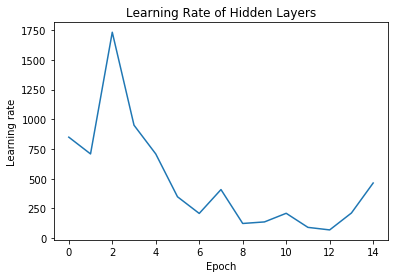

In [41]:
model=model_nn_3(30,10,True)
W=LearningRate(model,(24790))
LearningRate_plot(W)

**Defining CNN Model**

In [126]:
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Lambda, Input, Dense, Dropout, Flatten
from keras.layers.advanced_activations import LeakyReLU,ThresholdedReLU
from keras.layers.normalization import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import SGD,Adam,Nadam,Adamax,TFOptimizer

In [127]:
def cnn():
    
    # Create Model
    model = Sequential()
    model.add(Conv2D(32,kernel_size=(3, 3),activation='linear',input_shape=(28,28,1),padding='same'))
    model.add(LeakyReLU(alpha=0.1))
    model.add(MaxPooling2D((2, 2),padding='same'))
    model.add(Dropout(0.2))
    model.add(Conv2D(64,(3, 3),activation='linear',padding='same'))
    model.add(LeakyReLU(alpha=0.1))
    model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
    model.add(Dropout(0.2))
    model.add(Conv2D(128,(3, 3),activation='linear',padding='same'))
    model.add(LeakyReLU(alpha=0.1))
    model.add(Dropout(0.2))
    model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
    model.add(Flatten())
    model.add(Dense(256,activation='linear'))
    model.add(LeakyReLU(alpha=0.1))
    model.add(Dense(10,activation='softmax'))
    model.compile(loss='categorical_crossentropy',optimizer=Adam(learning_rate=0.1),metrics=['accuracy'])
    model.summary()
    
    return model
    

In [128]:
model=cnn()

Model: "sequential_35"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu_29 (LeakyReLU)   (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_22 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
leaky_re_lu_30 (LeakyReLU)   (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 7, 7, 64)        

In [129]:
X_train.shape,X_test.shape

((1000, 784), (1000, 784))

In [130]:
y_train.shape

(1000, 10)

In [131]:
X_train=X_train.reshape(1000,28,28,1)
X_test=X_test.reshape(1000,28,28,1)

In [132]:
X_train.shape

(1000, 28, 28, 1)

In [133]:
gen = ImageDataGenerator(width_shift_range=3,height_shift_range=3,rotation_range=3)
batches = gen.flow(X_train, y_train, batch_size=10)
val_batches = gen.flow(X_test, y_test, batch_size=10)

history=model.fit_generator(batches, steps_per_epoch=1000//10, epochs=30,validation_data=val_batches, validation_steps=1000//10)

Epoch 1/30
100/100 [==============================] - 4s 39ms/step - loss: 16014.3135 - accuracy: 0.1460 - val_loss: 1971.1371 - val_accuracy: 0.2670
Epoch 2/30
100/100 [==============================] - 3s 34ms/step - loss: 1030.2441 - accuracy: 0.2510 - val_loss: 67.2700 - val_accuracy: 0.2990
Epoch 3/30
100/100 [==============================] - 3s 35ms/step - loss: 153.7517 - accuracy: 0.3330 - val_loss: 191.4404 - val_accuracy: 0.3500
Epoch 4/30
100/100 [==============================] - 4s 37ms/step - loss: 1136.5329 - accuracy: 0.2720 - val_loss: 2472.2087 - val_accuracy: 0.1500
Epoch 5/30
100/100 [==============================] - 4s 36ms/step - loss: 1191.7899 - accuracy: 0.2600 - val_loss: 5188.4268 - val_accuracy: 0.1290
Epoch 6/30
100/100 [==============================] - 3s 35ms/step - loss: 8073340.3646 - accuracy: 0.1250 - val_loss: 18144960.0000 - val_accuracy: 0.1670
Epoch 7/30
100/100 [==============================] - 3s 34ms/step - loss: 4579967.4138 - accuracy: 0.

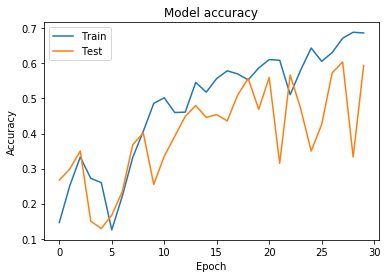

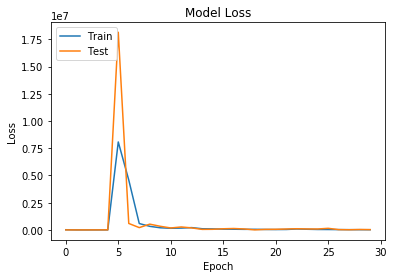

In [134]:
model_accuracy()
model_loss()

**References:**

https://www.kaggle.com/imrandude/fashion-mnist-cnn-imagedatagenerator